In [ ]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt

array([[[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]],

       [[180, 200, 230],
        [204, 230, 255],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       ...,

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [235, 245, 249],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]]], dtype=uint8)
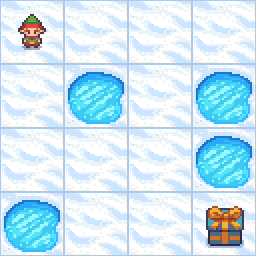

In [69]:
env = gym.make("FrozenLake-v1", is_slippery=False , render_mode="rgb_array")
obs, info = env.reset()
env.render()

In [ ]:
state_size = env.observation_space.n
state_size

np.int64(16)

In [ ]:
action_size = env.action_space.n
action_size

np.int64(4)

In [ ]:
Q = np.zeros((state_size , action_size))
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [70]:
alpha = 0.8
gamma = 0.95
epsilon = 1
decay_rate = 0.999
min_epsilon = 0.01
episodes = 5000
max_steps = 100

In [71]:
rewards = []

for ep in range(episodes):
  state , _ = env.reset()

  total_reward = 0

  for step in range(max_steps):
    if np.random.rand() < epsilon:
      action = env.action_space.sample()
    else :
      action = np.argmax(Q[state , :])

    new_state , reward , done , _ , _ = env.step(action)

    Q[state , action] = Q[state , action] + alpha * (reward + gamma * np.max(Q[new_state , :]) - Q[state , action])

    state = new_state
    total_reward += reward

    if done:
      break

  epsilon = max(min_epsilon , epsilon * decay_rate)
  rewards.append(total_reward)

print("Training is Completed")

Training is Completed


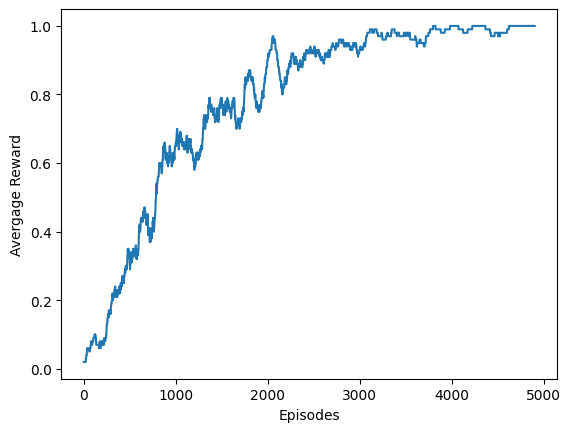

In [72]:
plt.plot(np.convolve(rewards , np.ones(100) / 100 , mode = "valid"))
plt.xlabel("Episodes")
plt.ylabel("Avergage Reward")
plt.show()

In [73]:
state, _ = env.reset()
done = False
total_rewards = 0

while not done:
  action = np.argmax(Q[state , :])
  state, reward, done, _, _ = env.step(action)
  print(state)
  total_rewards += reward
print(total_rewards)

4
8
9
13
14
15
1.0
